In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df= pd.read_csv("C:\\Users\\mahes\\Downloads\\UberDataset.csv")
df.head()
# df.shape
# df.info()
# df.describe 

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [90]:
df['PURPOSE'].fillna("NOT",inplace=True)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [100]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [108]:
from datetime import datetime
df['date']= pd.DatetimeIndex(df['START_DATE']).date
df['time']= pd.DatetimeIndex(df['START_DATE']).hour
df['day-night']= pd.cut(x=df['time'],bins = [0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [110]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175')])

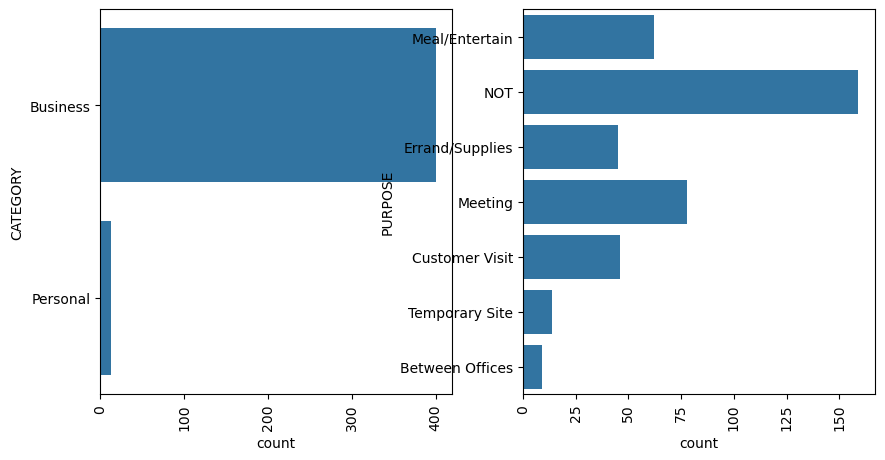

In [112]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.xticks(rotation=90)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

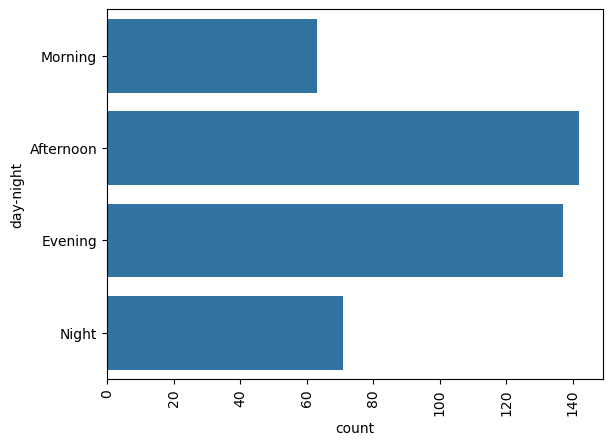

In [118]:
sns.countplot(df['day-night'])
plt.xticks(rotation=90)

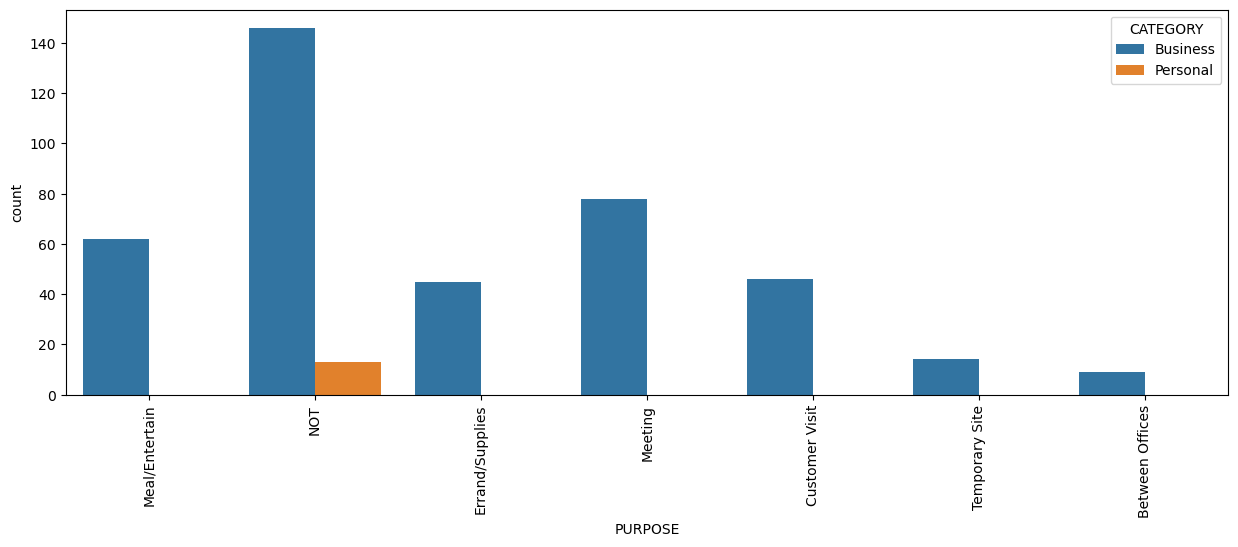

In [120]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [126]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

<Axes: >

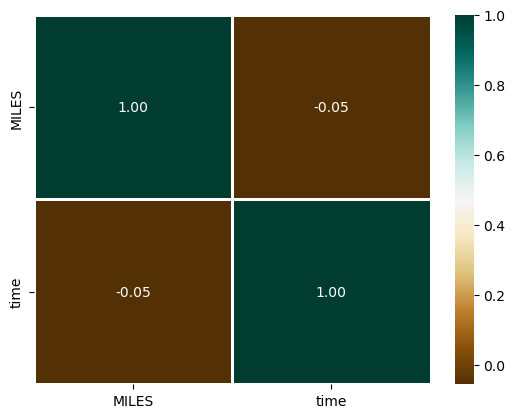

In [128]:
numeric_dataset = df.select_dtypes(include=['number'])
sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)


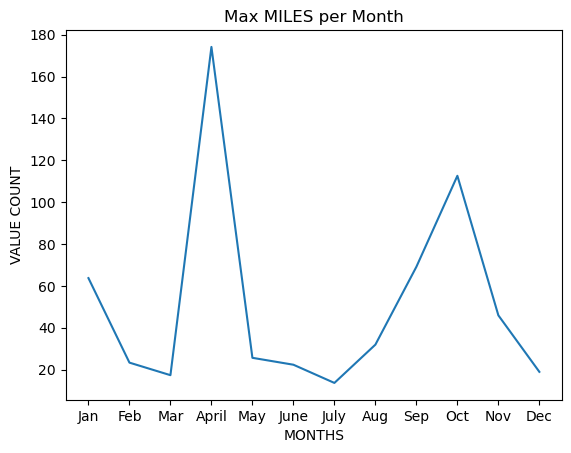

In [140]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month  # Use df, not dataset
month_label = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
               9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['MONTH_LABEL'] = df['MONTH'].map(month_label)
mon_counts = df['MONTH_LABEL'].value_counts(sort=False)
month_max_miles = df.groupby('MONTH_LABEL', sort=False)['MILES'].max()
result_df = pd.DataFrame({
    "MONTHS": month_max_miles.index,
    "VALUE COUNT": month_max_miles.values
})
sns.lineplot(data=result_df, x='MONTHS', y='VALUE COUNT')
plt.xlabel('MONTHS')
plt.ylabel('VALUE COUNT')
plt.title('Max MILES per Month')
plt.show()

Text(0, 0.5, 'COUNT')

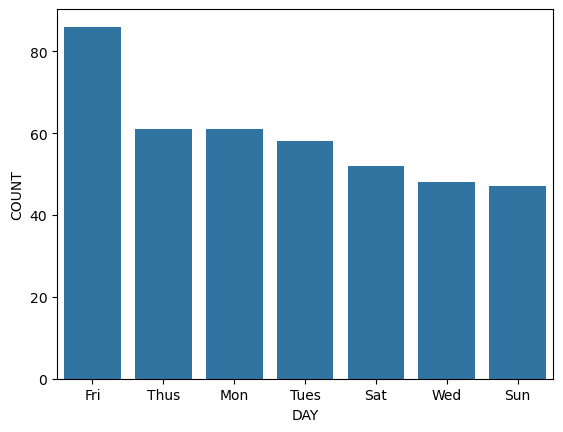

In [154]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: ylabel='MILES'>

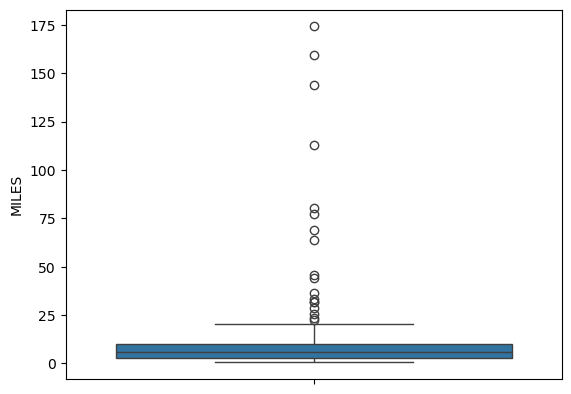

In [156]:
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

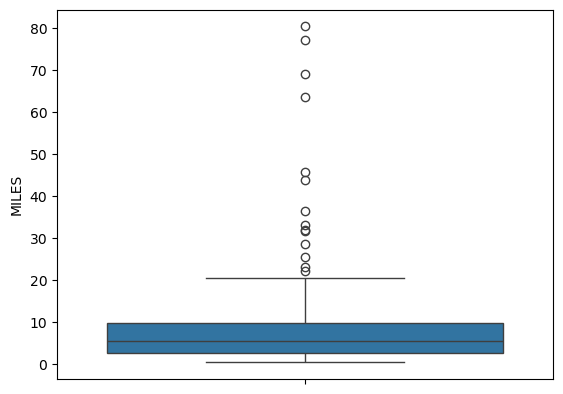

In [158]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\mahes\AppData\Local\Temp\ipykernel_26592\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

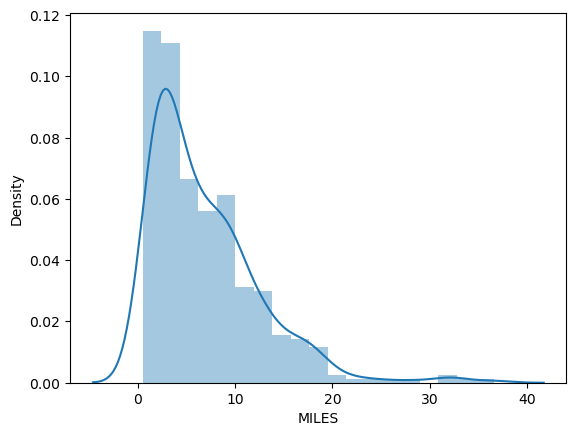

In [160]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])